<a href="https://colab.research.google.com/github/JuanFelipeOrdonez/Procesamiento-digital-de-senales/blob/main/PDS_Matrix_Fourier_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consulta: ***¿Cómo afecta el cambio en el tamaño de la matriz en la representación matricial de la Transformada de Fourier Discreta (DFT) cuando la entrada es un vector de señal?***

Al aumentar el tamaño de la matriz en la Transformada de Fourier, se mejora la resolución en la representación de frecuencias, lo que permite visualizar el espectro con más detalle, aunque con mayor costo computacional. Si el aumento se hace agregando ceros a la señal, no se añade nueva información, pero se logra una interpolación más suave. Por otro lado, reducir el tamaño de la matriz puede provocar pérdida de información y disminuir la precisión de la transformación.

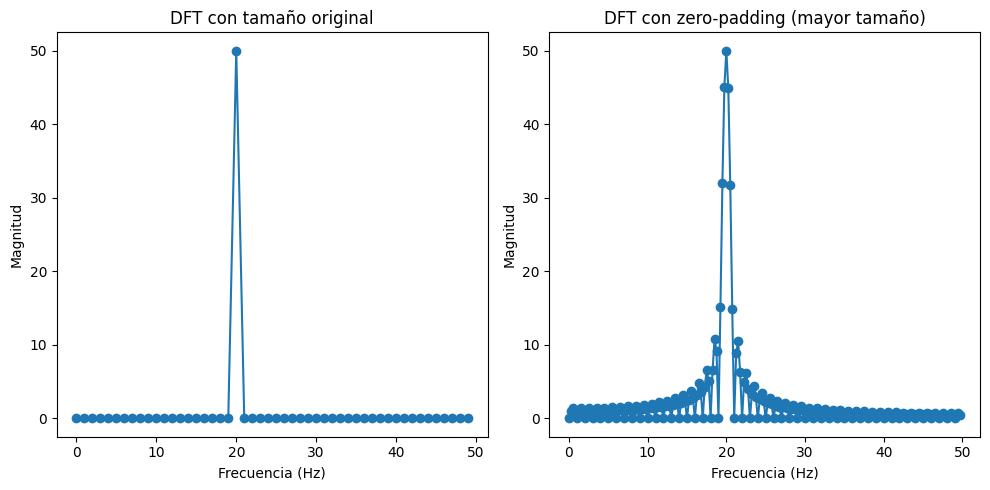

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de los parámetros de la señal
fs = 100  # Frecuencia de muestreo en Hz
T = 1     # Duración total de la señal en segundos
N = fs * T  # Número total de muestras de la señal

# Generación del vector de tiempo con N puntos uniformemente espaciados
t = np.linspace(0, T, N, endpoint=False)

# Definición de la señal: una onda seno de 20 Hz
f_seno = 20  # Frecuencia de la onda seno en Hz
x = np.sin(2 * np.pi * f_seno * t)  # Cálculo de la señal en cada punto de tiempo

# Cálculo de la Transformada de Fourier Discreta (DFT) de la señal original
X_original = np.fft.fft(x)  # Aplicación de la FFT (Transformada Rápida de Fourier)
freq_original = np.fft.fftfreq(N, d=1/fs)  # Obtención de las frecuencias asociadas

# Aumento del tamaño de la matriz (zero-padding) para mejorar la resolución en frecuencia
N_padded = 4 * N  # Cuadruplicamos el número de puntos de la DFT
x_padded = np.pad(x, (0, N_padded - N), 'constant')  # Se agregan ceros al final de la señal
X_padded = np.fft.fft(x_padded)  # Cálculo de la FFT con la señal extendida
freq_padded = np.fft.fftfreq(N_padded, d=1/fs)  # Nueva distribución de frecuencias

# Gráficos de los espectros de frecuencia
plt.figure(figsize=(10, 5))  # Configuración del tamaño de la figura

# Subgráfico 1: Transformada de Fourier con el tamaño original
plt.subplot(1, 2, 1)
plt.plot(freq_original[:N//2], np.abs(X_original[:N//2]), 'o-')  # Magnitud del espectro
plt.title("DFT con tamaño original")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")

# Subgráfico 2: Transformada de Fourier con zero-padding
plt.subplot(1, 2, 2)
plt.plot(freq_padded[:N_padded//2], np.abs(X_padded[:N_padded//2]), 'o-')  # Magnitud del espectro
plt.title("DFT con zero-padding (mayor tamaño)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")

# Ajuste del diseño para evitar solapamientos
plt.tight_layout()
plt.show()